# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud.
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [2]:


df = pd.read_csv('readonly/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [3]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score

def reponse_deux():
    dummy = DummyClassifier()
    clf.fit(X_train,y_train)
    prediction = dummy.predict(X_test)
    score = dummy.score(X_test,y_test)
    recall_score = recall_score(y_test,prediction)
    
    return score,recall_score

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [ ]:
from sklearn.metrics import recall_score, precision_score
from sklearn.svm import SVC

def reponse_trois():
    classifier = SVC()
    classifier.fit(X_train,y_train)
    predictions = classifier.predict(X_test)
    score = clf.score(X_test,y_test)
    recall_score = recall_score(y_test,predictions)
    precision_score = precision_score(y_test,predictions)
    
    return (score,recall_score,precision_score)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

def reponse_quatre():
    classifier = SVC(C=1e9,gamma=1e-07)
    classifier.fit(X_train,y_train)
    yScores= classifier.decision_function(X_test)>-220
    confusionMatrix=confusion_matrix(y_test,yScores)
    return confusionMatrix
reponse_quatre()

array([[5320,   24],
       [  14,   66]], dtype=int64)

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

[]


array([0.0125, 0.175 , 0.175 , 0.3375, 0.3375, 0.8125, 0.8125, 0.825 ,
       0.825 , 0.8375, 0.8375, 0.85  , 0.85  , 0.8625, 0.8625, 0.875 ,
       0.875 , 0.8875, 0.8875, 0.9   , 0.9   , 0.9125, 0.9125, 0.925 ,
       0.925 , 0.9375, 0.9375, 0.95  , 0.95  , 0.95  , 0.95  , 0.95  ,
       0.95  , 0.9625, 0.9625, 0.975 , 0.975 , 0.975 , 0.975 , 0.975 ,
       0.975 , 0.9875, 0.9875, 1.    , 1.    , 1.    , 1.    , 1.    ,
       1.    ])

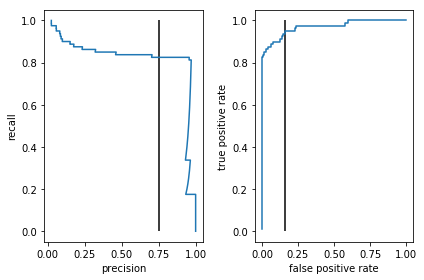

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve,roc_curve
def reponse_cinq():
    lr = LogisticRegression().fit(X_train,y_train)
    y_score = lr.decision_function(X_test)
    precision,recall,_ = precision_recall_curve(y_test,y_score)
    fpr,tpr,_=roc_curve(y_test,y_score)
    precision_index = np.argwhere(precision==0.75)
    recall_specified=recall[precision_index]
    fpr_index=np.argwhere(fpr==0.16)
    print(fpr_index)
    tpr_specified = tpr[fpr_index]
    
    plt.figure()
    plt.subplot(1,2,1)
    plt.plot(precision,recall)
    plt.xlabel('precision')
    plt.ylabel('recall')
    plt.vlines(0.75,0,1)
    plt.subplot(1,2,2)
    plt.plot(fpr,tpr)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.vlines(0.16,0,1)
    plt.tight_layout()
     
reponse_cinq()
    

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

def reponse_six():
    lr = LogisticRegression()
    grid_values = {'penalty':['l1','l2'],'C':[0.01,0.1,1,10,100]}
    grid_lr_recall = GridSearchCV(lr,param_grid=grid_values,scoring='recall')
    grid_lr_recall.fit(X_train,y_train)
    results = grid_lr_recall.cv_results_
    test_scores = np.vstack((results['split0_test_score'],
                             results['split1_test_score'],
                             results['split2_test_score']))
    return test_scores.mean(axis=0).reshape(5,2)
